In [30]:
import yfinance as yf

get = yf.Ticker('BTC-USD')
df = get.history(period='10y')


In [31]:
data = df.reset_index()

In [32]:
date = data['Date']

In [33]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0
...,...,...,...,...,...,...,...
2024-06-26 00:00:00+00:00,61789.675781,62434.136719,60695.187500,60811.277344,22506003064,0.0,0.0
2024-06-27 00:00:00+00:00,60811.226562,62293.863281,60585.332031,61604.800781,21231745045,0.0,0.0
2024-06-28 00:00:00+00:00,61612.804688,62126.097656,59985.402344,60320.136719,24952866877,0.0,0.0


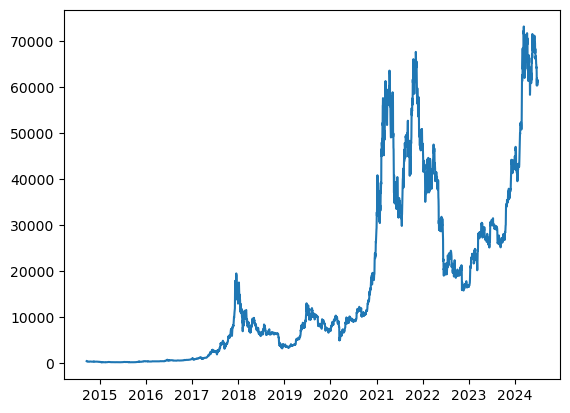

In [34]:
import matplotlib.pyplot as plt
plt.plot(df['Close'])

In [35]:
date = data['Date']
X = data[['Close']]
y = X[1:]
X = X[:-1]

In [36]:
print(len(X),len(y))

3574 3574


In [37]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.8, shuffle=False)

In [38]:
q80 = int(len(date)*0.8)
date_train = date[:q80]
date_test = date[q80:]

In [39]:
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train, y_train)

LinearRegression()

In [40]:
y_pred = LR.predict(x_test)

In [41]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error : {mae:.4f}")
print(f"Mean Squared Error  : {mse:.4f}")
print(f"R2 Score            : {r2:.4f}")


Mean Absolute Error : 626.1950
Mean Squared Error  : 1074495.7589
R2 Score            : 0.9961


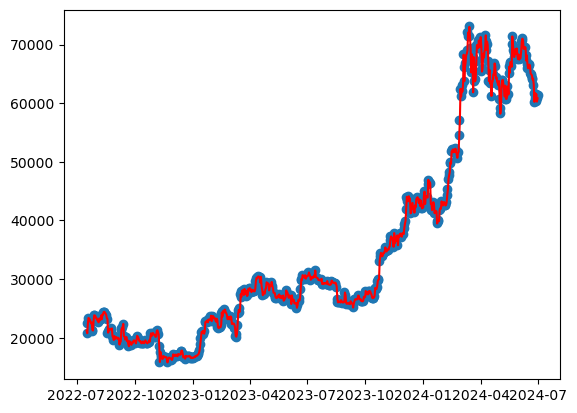

In [42]:
import matplotlib.pyplot as plt

plt.scatter(date_test,y_test)
plt.plot(date_test,y_pred, color='red')

In [43]:
import pickle

file = open('LR.pickle','wb')
pickle.dump(LR,file)
file.close()